# Regressão Logística I
## Tarefa I

Neste exercício vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável ```num```(a 14$^a$ variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [3]:
df['flag_doente'] = (df['num'] != 0).astype('int64')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1


1. Monte uma bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE). Calcule-o.

In [33]:
crosstab = pd.crosstab(df['sex'], df['flag_doente'], margins=True)
crosstab.columns = ['Saudáveis', 'Doentes', 'Total']

crosstab['quantidade_media_doentes'] = crosstab['Doentes'] / crosstab['Total']
crosstab['odds'] = crosstab['Doentes'] / crosstab['Saudáveis']
crosstab['odds_ratio'] = crosstab['odds'] / crosstab.loc['All', 'odds']
crosstab['logito'] = np.log(crosstab['odds'])
crosstab['WOE'] = np.log(crosstab['odds_ratio'])

crosstab

,Saudáveis,Doentes,Total,quantidade_media_doentes,odds,odds_ratio,logito,WOE
sex,,,,,,,,
0.0,72,25,97,0.257732,0.347222,0.409672,-1.057790,-0.892398
1.0,92,114,206,0.553398,1.239130,1.461996,0.214410,0.379802
All,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000


2. Monte uma bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorize a variável em 5 grupos
- Calcule as mesmas quantidades calculadas no execício anterior
- Calcule também o valor médio da variável ```age```

In [25]:
# Categorizar a variável 'age' em 5 grupos utilizando pd.qcut
df['age_group'] = pd.qcut(df['age'], q=5, labels=[f'{i+1}' for i in range(5)])

# Gerando a tabela crosstab para 'age_group' e 'flag_doente'
crosstab_idade = pd.crosstab(df['age_group'], df['flag_doente'], margins=True, margins_name='Total')
crosstab_idade.columns = ['Saudáveis', 'Doentes', 'Total']

crosstab_idade['Media Doentes'] = crosstab_idade['Doentes'] / crosstab_idade['Total']
crosstab_idade['Odds'] = crosstab_idade['Doentes'] / crosstab_idade['Saudáveis']
crosstab_idade['Odds Ratio'] = crosstab_idade['Odds'] / crosstab_idade.loc['Total', 'Odds']
crosstab_idade['Logito'] = np.log(crosstab_idade['Odds'])
crosstab_idade['WOE'] = np.log(crosstab_idade['Odds Ratio'])

# Calculando o valor médio da variável 'age' em cada grupo
age_mean_per_group = df.groupby('age_group')['age'].mean()
crosstab_idade['Idade Média'] = age_mean_per_group

crosstab_idade


,Saudáveis,Doentes,Total,Media Doentes,Odds,Odds Ratio,Logito,WOE,Idade Média
age_group,,,,,,,,,
1,47,16,63,0.253968,0.340426,0.401653,-1.077559,-0.912166,41.222222
2,42,22,64,0.343750,0.523810,0.618020,-0.646627,-0.481235,50.000000
3,32,39,71,0.549296,1.218750,1.437950,0.197826,0.363218,56.211268
4,13,32,45,0.711111,2.461538,2.904261,0.900787,1.066179,60.355556
5,30,30,60,0.500000,1.000000,1.179856,0.000000,0.165392,66.516667
Total,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000,NaN


3. Visualize a informação da bivariada construída acima através de um gráfico da sua escolha.

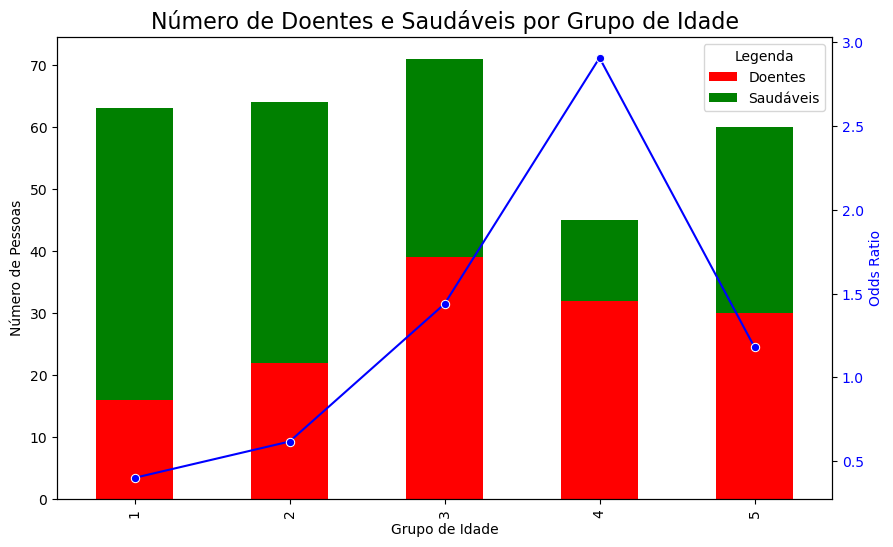

In [49]:
# Configuração do gráfico de barras para o número de doentes e saudáveis em cada grupo de idade
fig, ax1 = plt.subplots(figsize=(10, 6))

# Removendo o 'Total'
crosstab_idade_filtrado = crosstab_idade.drop('Total')

# Plotando a quantidade de doentes e saudáveis para cada grupo de idade
crosstab_idade_filtrado[['Doentes', 'Saudáveis']].plot(kind='bar', stacked=True, ax=ax1, color=['red', 'green'])
ax1.set_title('Número de Doentes e Saudáveis por Grupo de Idade', fontsize=16)
ax1.set_ylabel('Número de Pessoas')
ax1.set_xlabel('Grupo de Idade')
ax1.legend(title='Legenda', loc='upper right')

# Criando um segundo eixo para o gráfico de odds ratio
ax2 = ax1.twinx()
sns.lineplot(data=crosstab_idade_filtrado['Odds Ratio'], marker='o', color='blue', ax=ax2)
ax2.set_ylabel('Odds Ratio', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

plt.show()
